In [22]:
import matplotlib.pyplot as plt
import json
import pandas as pd
import numpy as np
import matplotlib.patches as mpatches


In [ ]:
config_file = "configs/experiment_results_synthetic_easier.json"
with open(config_file) as json_file:
    results = json.load(json_file)

# experiments = ['baseNN', 'softCBM', 'latentCBM', 'leakageLoss', 'leakageDelay', 'sequentialCBM', 'sequentialLeakage']
# experiments = ['softCBM', 'latentCBM', 'sequentialLeakage', 'hardCBM', 'hardLatentCBM', 'hardLeakageCBM', 'hardSequentialLeakage']
# experiments = ['sequentialCBM', 'sequentialLatentCBM', 'sequentialLeakage', 'hardSequentialLeakage', 'hardSequentialLatentCBM']
experiments = ['baseNN', 'softCBM', 'latentCBM', 'leakageLoss', 'leakageDelay', 'sequentialCBM', 'sequentialLeakage', 'sequentialLatentCBM', 'hardCBM', 'hardLatentCBM', 'hardLeakageCBM', 'hardSequentialCBM', 'hardSequentialLeakage', 'hardSequentialLatentCBM']
# experiments = ['baseNN', 'hardCBM', 'hardSequentialLeakage', 'hardSequentialLatentCBM']
headers = ["Method", "Loss", "Label Accuracy", "Label Loss", "Concept Accuracy", "Concept Loss", "Latent Loss"]
headers = ["Method", "Label Accuracy", "Concept Accuracy"]
expr_results = []
for expr in experiments:
    expr_result = [expr]    
    expr_result.extend([float(results[expr]['results'].get(key)) for key in headers[1:]])
    expr_results.append(expr_result)
# expr_results = np.array(expr_results, dtype=float)

In [10]:
df = pd.DataFrame.from_records(expr_results, columns=headers)
display(df)

,Method,Label Accuracy,Concept Accuracy
0,baseNN,0.73030,0.468378
1,softCBM,0.70975,0.811622
2,latentCBM,0.74675,0.826941
3,leakageLoss,0.65580,0.819806
4,leakageDelay,0.70760,0.807525
5,sequentialCBM,0.65625,0.839109
6,sequentialLeakage,0.76695,0.838628
7,sequentialLatentCBM,0.77390,0.839381
8,hardCBM,0.68265,0.803084
9,hardLatentCBM,0.71690,0.824897


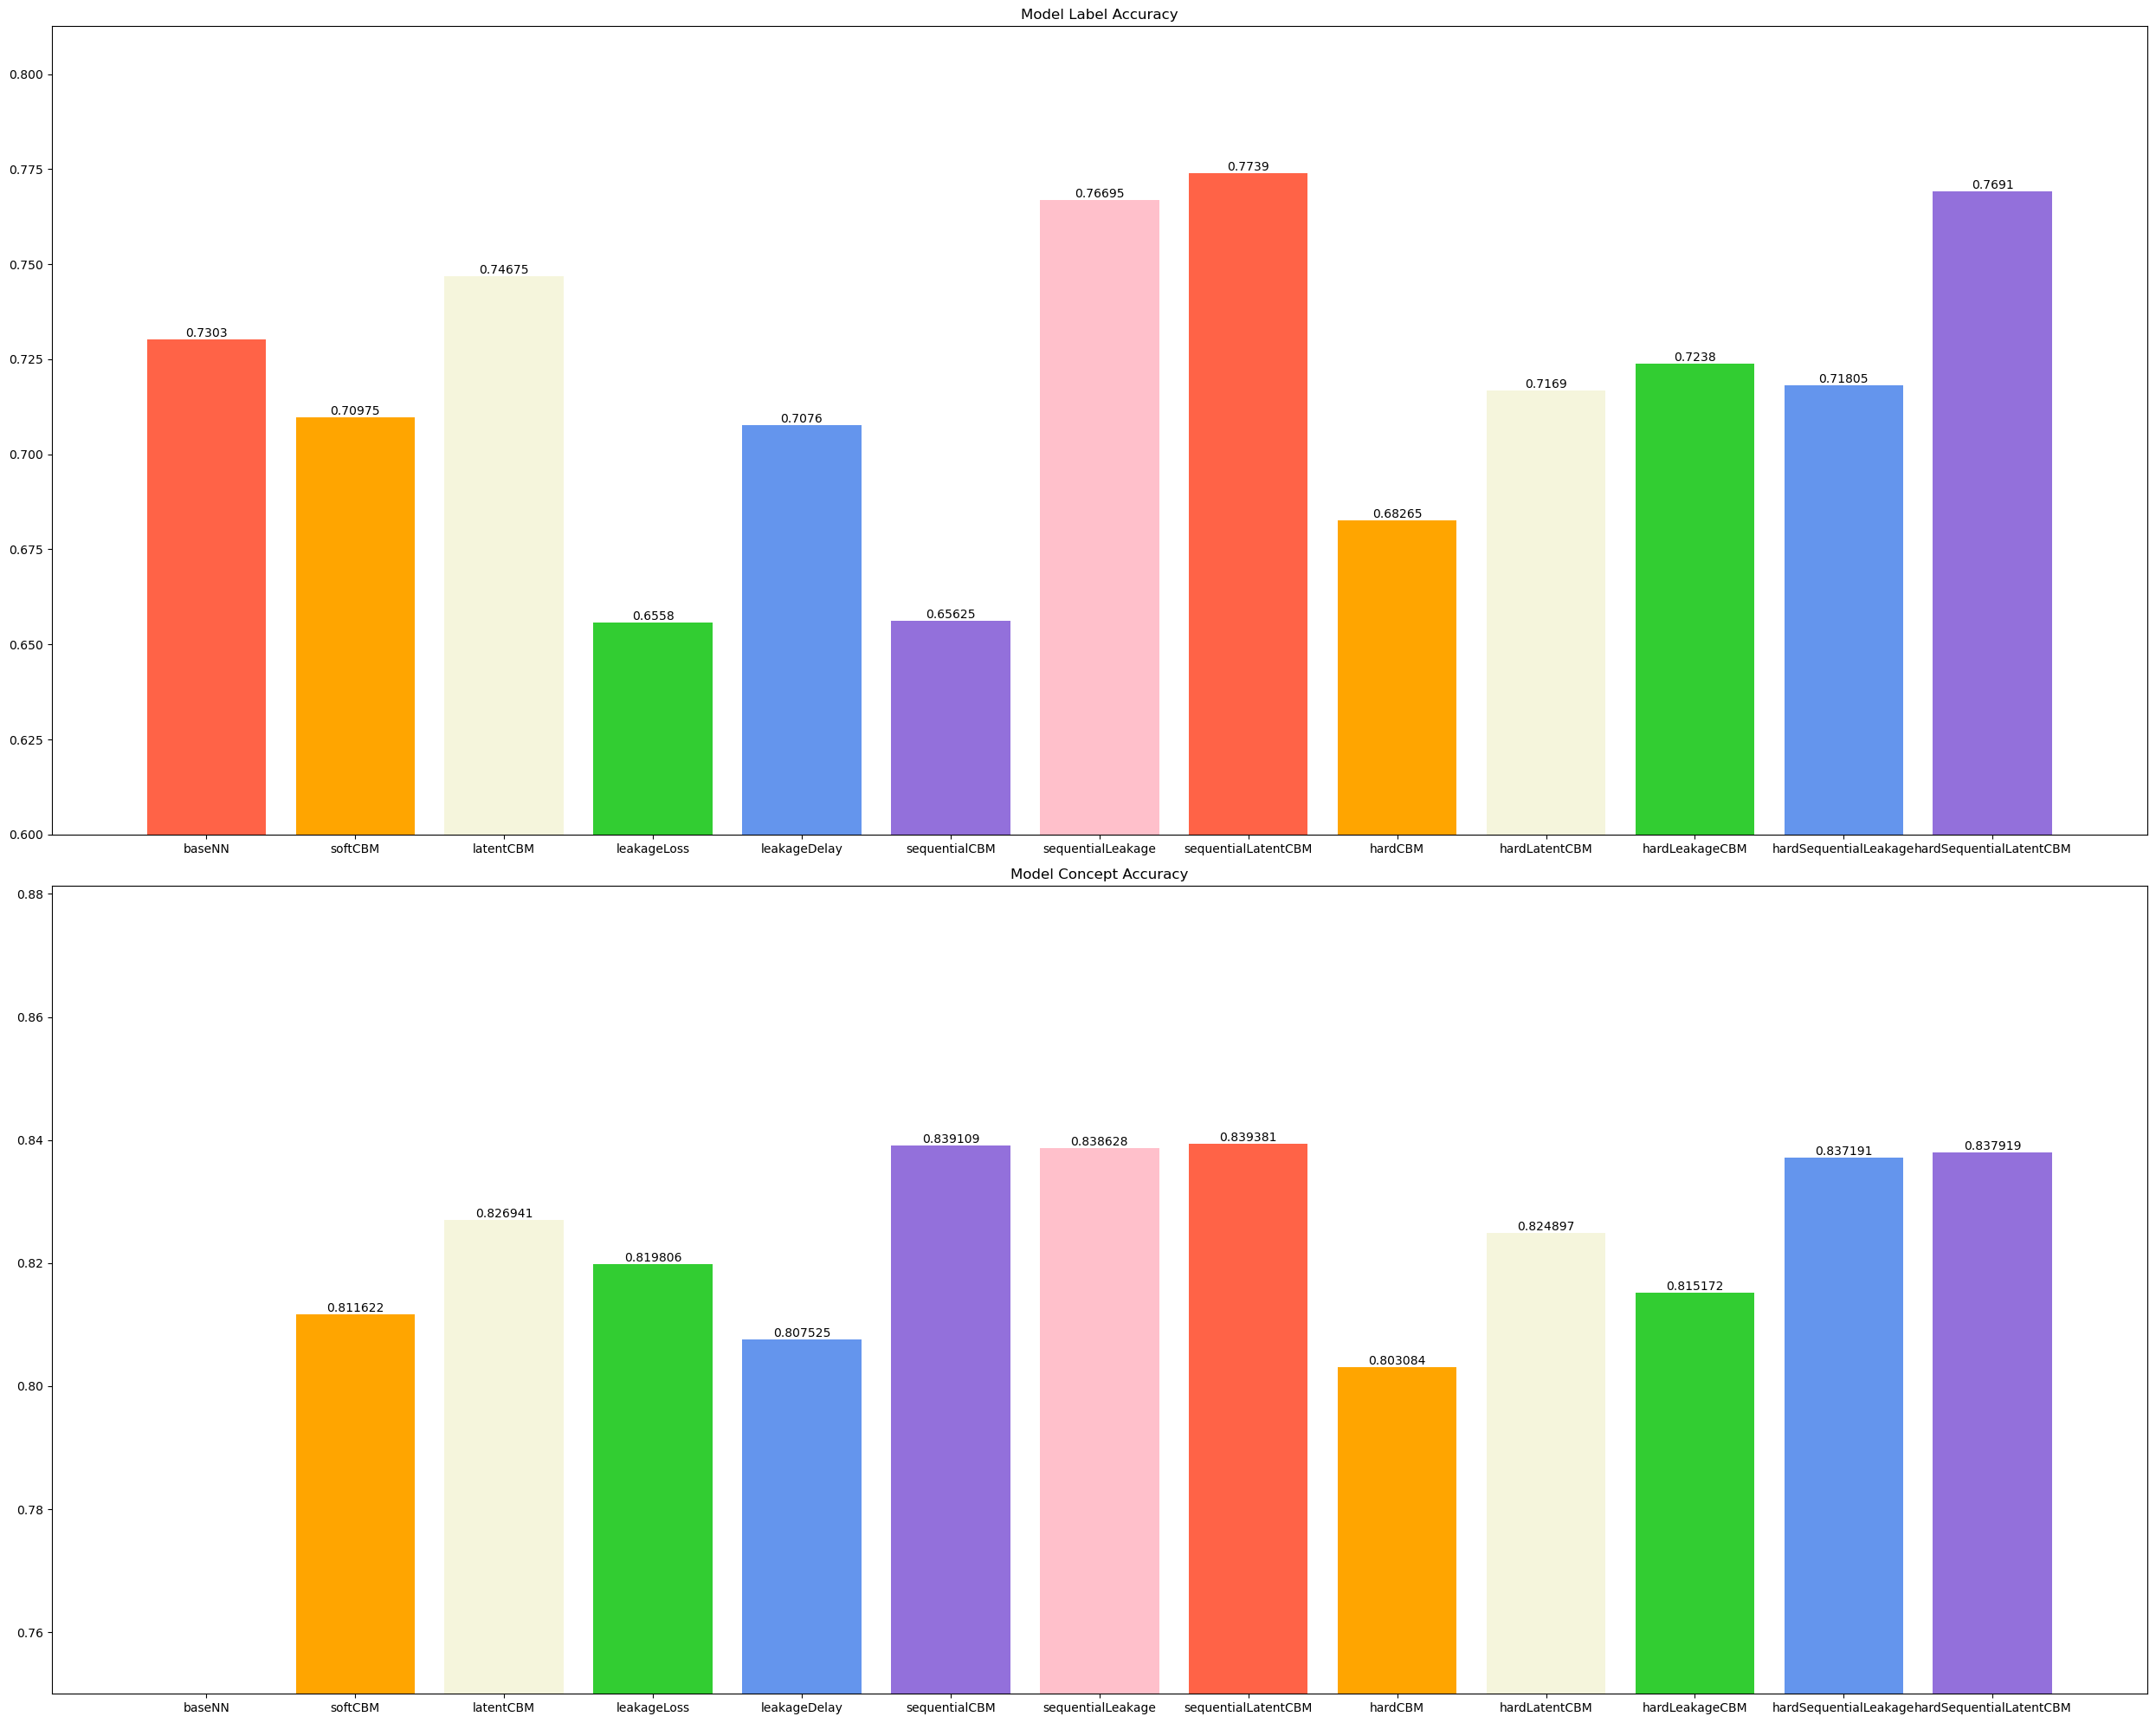

In [12]:
# plt.figure(figsize=(10,30))
fig, axs = plt.subplots(2, 1, figsize=(25, 20))
colors = ['tomato', 'orange', 'beige', 'limegreen', 'cornflowerblue', 'mediumpurple', 'pink']
for i in range(1, len(headers)):
    bar = axs[(i-1)%3].bar(experiments, df[headers[i]], color=colors)
    axs[(i-1)%3].set_title(f"Model {headers[i]}")
    axs[(i-1)%3].bar_label(bar, label_type='edge')

axs[0].set_ylim(bottom=0.6)
axs[1].set_ylim(bottom=0.75)
# axs[2].set_ylim(top=0.002)
plt.tight_layout()
plt.show()


In [37]:
config_file = "configs/synthetic_trials/experiment_results_synthetic_1.json"
with open(config_file) as json_file:
    results = json.load(json_file)
experiments = ['softCBM', 'latentCBM', 'leakageLoss', 'leakageDelay', 'sequentialCBM', 'sequentialLeakage', 'sequentialLatentCBM', 'hardCBM', 'hardLatentCBM', 'hardLeakageCBM', 'hardSequentialCBM', 'hardSequentialLeakage', 'hardSequentialLatentCBM']
# experiments = ['hardCBM', 'hardSequentialLeakage', 'hardSequentialLatentCBM']
headers = ["Method", "Label Accuracy", "Intervention Label Accuracy"]
expr_results = []
for expr in experiments:
    expr_result = [expr]
    intervention_acc = list(results[expr]['results'].get("Intervention Label Accuracy"))
    intervention_acc.insert(0, results[expr]['results'].get("Label Accuracy"))
    expr_result.extend(intervention_acc)
    expr_results.append(expr_result)
headers = ["Method", "Default Accuracy", "4 Interventions", "8 Interventions", "12 Interventions", "16 Interventions"]
df = pd.DataFrame.from_records(expr_results, columns=headers)
display(df)

,Method,Default Accuracy,4 Interventions,8 Interventions,12 Interventions,16 Interventions
0,softCBM,0.66620,0.71340,0.72240,0.72510,0.72525
1,latentCBM,0.71755,0.81065,0.81920,0.82090,0.82095
2,leakageLoss,0.64760,0.70635,0.71745,0.71960,0.72000
3,leakageDelay,0.65545,0.71990,0.73070,0.73210,0.73185
4,sequentialCBM,0.65810,0.73940,0.74195,0.74195,0.74195
5,sequentialLeakage,0.76625,0.85980,0.86435,0.86450,0.86450
6,sequentialLatentCBM,0.75865,0.83470,0.83640,0.83670,0.83670
7,hardCBM,0.68600,0.73340,0.73395,0.73395,0.73395
8,hardLatentCBM,0.73760,0.84605,0.84630,0.84630,0.84630
9,hardLeakageCBM,0.68360,0.79805,0.79905,0.79905,0.79905


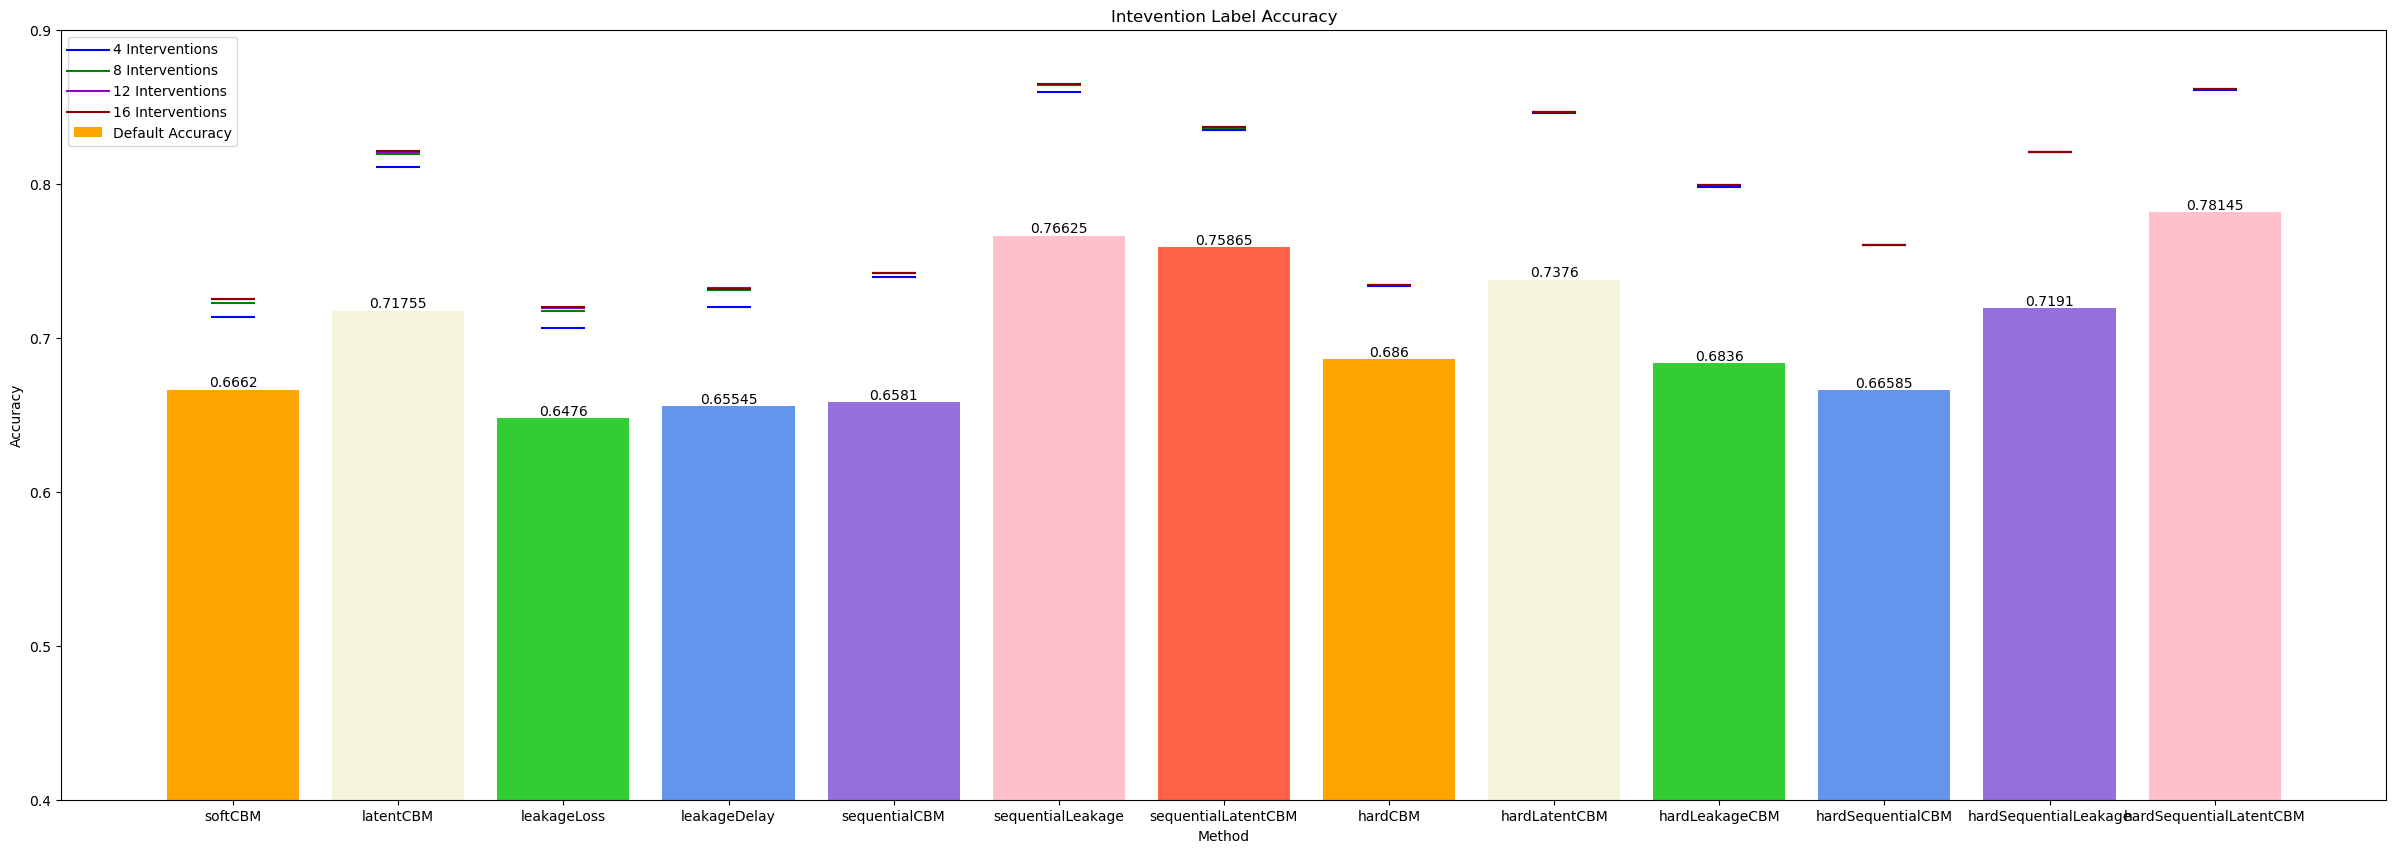

In [38]:
colors = ['orange', 'beige', 'limegreen', 'cornflowerblue', 'mediumpurple', 'pink', 'tomato']
plt.figure(figsize=(30,10))
bar = plt.bar(experiments, df["Default Accuracy"], color=colors, label='Default Accuracy')
plt.bar_label(bar, label_type='edge')
plt.scatter(experiments, df["4 Interventions"], color='blue', label='4 Interventions', marker="_", s=1000)
plt.scatter(experiments, df["8 Interventions"], color='green', label='8 Interventions', marker="_", s=1000)
plt.scatter(experiments, df["12 Interventions"], color='darkviolet', label='12 Interventions', marker="_", s=1000)
plt.scatter(experiments, df["16 Interventions"], color='darkred', label='16 Interventions', marker="_", s=1000)
plt.ylim(bottom=0.4, top=0.9)
# plt.bar(r2, df["4 Interventions"], color='red', width=bar_width, label='Group 2')

# Add labels to the x-axis
plt.xlabel('Method')
# plt.xticks([r + bar_width/2 for r in range(len(headers))], headers)

# Add a y-axis label
plt.ylabel('Accuracy')

# Add a title to the plot
plt.title('Intevention Label Accuracy')

# Add a legend
plt.legend()

# Show the plot
plt.show()

In [69]:
config_file = "configs/experiment_results_synthetic_10_hard_scramble.json"
with open(config_file) as json_file:
    results = json.load(json_file)

# experiments = ['baseNN', 'softCBM', 'latentCBM', 'leakageLoss', 'leakageDelay', 'sequentialCBM', 'sequentialLeakage']
# experiments = ['softCBM', 'latentCBM', 'sequentialLeakage', 'hardCBM', 'hardLatentCBM', 'hardLeakageCBM', 'hardSequentialLeakage']
# experiments = ['sequentialCBM', 'sequentialLatentCBM', 'sequentialLeakage', 'hardSequentialLeakage', 'hardSequentialLatentCBM']
experiments = ['baseNN', 'softCBM', 'latentCBM', 'leakageLoss', 'leakageDelay', 'sequentialLeakage', 'sequentialLatentCBM', 'hardCBM', 'hardLatentCBM', 'hardLeakageCBM', 'hardSequentialLeakage', 'hardSequentialLatentCBM', 'hardDelaySequentialLeakage', 'hardDelaySequentialLatent']
# experiments = ['baseNN', 'hardCBM', 'hardSequentialLeakage', 'hardSequentialLatentCBM']
experiments = ["latentCBM", "leakageLoss", "leakageDelay", "sequentialLeakage", "sequentialLatentCBM",  "hardLatentCBM", 
                "hardLeakageCBM", "hardSequentialLeakage", "hardSequentialLatentCBM", "hardDelaySequentialLeakage", "hardDelaySequentialLatent"]
experiments = ["hardLeakageCBM", "hardSequentialLeakage", "hardDelaySequentialLeakage"]
headers = ["Method", "Label Accuracy"]
expr_results = []
for expr in experiments:
    # expr_result = [expr]    
    expr_results.append(results[expr]['results']['Label Accuracy'])
    # expr_results.append(expr_result)
# df = pd.DataFrame(data=np.array(expr_results).T, columns=experiments)

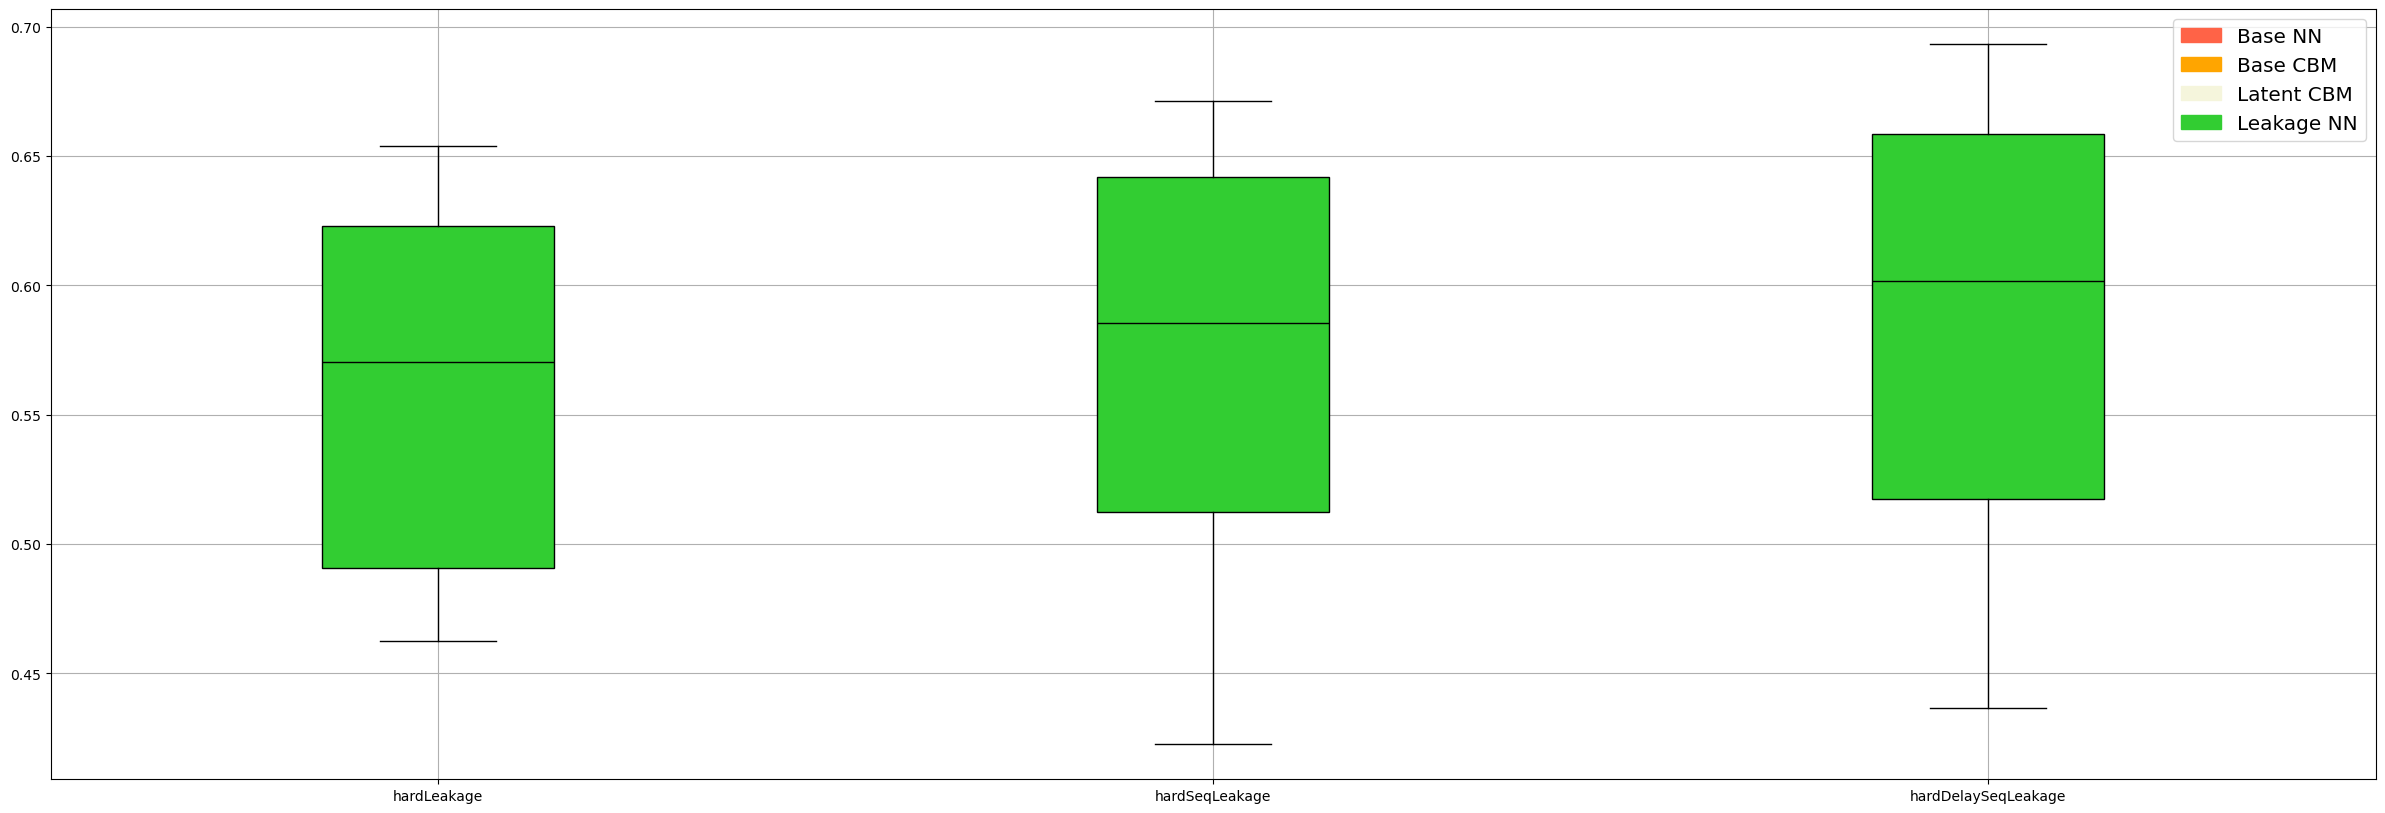

In [70]:
plt.figure(figsize=(30,10))
# df.boxplot(color='b')
# expr_names = ['baseNN', 'softCBM', 'softLatent', 'softLeakage', 'softLeakageDelay', 'softSeqLeakage', 'softSeqLatent', 'hardCBM', 'hardLatent', 'hardLeakage', 'hardSeqLeakage', 'hardSequLatent', 'hardDelaySeqLeakage', 'hardDelaySeqLatent']
# expr_names = ["softLatent", "softLeakage", "softLeakageDelay", "softSeqLeakage", "softSeqLatent", "hardLatent", 
                # "hardLeakage", "hardSeqLeakage", "hardSequLatent", "hardDelaySeqLeakage", "hardDelaySeqLatent"]
name_map = {'baseNN': 'baseNN', 'softCBM': 'softCBM', 'latentCBM': 'softLatent', 'leakageLoss': 'softLeakage', 'leakageDelay': 'softLeakageDelay', 'sequentialLeakage': 'softSeqLeakage', 'sequentialLatentCBM': 'softSeqLatent', 'hardCBM': 'hardCBM', 'hardLatentCBM': 'hardLatent', 'hardLeakageCBM': 'hardLeakage', 'hardSequentialLeakage': 'hardSeqLeakage', 'hardSequentialLatentCBM': 'hardSeqLatent', 'hardDelaySequentialLeakage': 'hardDelaySeqLeakage', 'hardDelaySequentialLatent': 'hardDelaySeqLatent'}
expr_names = [name_map[expr] for expr in experiments]
# colors = ['tomato', 'orange', 'beige', 'limegreen', 'limegreen', 'limegreen', 'beige', 'orange', 'beige', 'limegreen', 'limegreen', 'beige', 'limegreen', 'beige']
color_map = {'baseNN': 'tomato', 'softCBM': 'orange', 'softLatent': 'beige', 'softLeakage': 'limegreen', 'softLeakageDelay': 'limegreen', 'softSeqLeakage': 'limegreen', 'softSeqLatent': 'beige', 'hardCBM': 'orange', 'hardLatent': 'beige', 'hardLeakage': 'limegreen', 'hardSeqLeakage': 'limegreen', 'hardSequLatent': 'beige', 'hardDelaySeqLeakage': 'limegreen', 'hardDelaySeqLatent': 'beige'}
colors = [color_map[name] for name in expr_names]
boxes = plt.boxplot(expr_results, tick_labels=expr_names, patch_artist=True, medianprops={'color': 'black'})
for box, color in zip(boxes['boxes'], colors):
    box.set(facecolor=color)
tomato_patch = mpatches.Patch(color='tomato', label='Base NN')
orange_patch = mpatches.Patch(color='orange', label='Base CBM')
beige_patch = mpatches.Patch(color='beige', label='Latent CBM')
limegreen_patch = mpatches.Patch(color='limegreen', label='Leakage NN')
plt.legend(handles=[tomato_patch, orange_patch, beige_patch, limegreen_patch], fontsize='x-large')
plt.grid()
plt.show()